# Libraries Used in Project

In [1]:
#This are all Libraries which I have used in project Starting for EDA,Data Visualization,Preprocessing,Feature Extraction,Classification Model,evaluation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_selection import SelectPercentile,f_classif,chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_curve, roc_auc_score, auc,make_scorer,f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from scipy.sparse import hstack, csr_matrix
import xgboost as xgb

# Data Reading 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv
/kaggle/input/train-data/train.csv


In [3]:
#By help of read_csv method of pandas library we are able to read train.csv file
train_data_frame485 = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")

In [4]:
#By help of read_csv method of pandas library we are able to read test.csv file
test_data_frame485 = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

In [5]:
#By help of read_csv method of pandas library we are able to read movies.csv file
movie_data_frame485 = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

In [6]:
#DataFrame.head() method is used to display first 5 rows of dataframe by Default
movie_data_frame485.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [7]:
#DataFrame.head() method is used to display first 5 rows of dataframe by Default
train_data_frame485.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [8]:
#DataFrame.head() method is used to display first 5 rows of dataframe by Default
test_data_frame485.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


# Exploratory Data Analysis and Data Visualization

In [9]:
#.shape is used to get Dimension of DataFrame
movie_data_frame485.shape

(143258, 14)

In [10]:
#.shape is used to get Dimension of DataFrame
train_data_frame485.shape

(162758, 5)

In [11]:
#.shape is used to get Dimension of DataFrame
test_data_frame485.shape

(55315, 4)

In [12]:
# DataFrame.columns is used to get names of all columns in Dataframe
movie_data_frame485.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [13]:
# DataFrame.duplicated.count() is used to get count to duplicates in dataframe
movie_data_frame485.duplicated().count()

143258

In [14]:
# movie_data.drop_duplicates is used to drop Duplicates based on "movieid" column
movie_data_frame485 = movie_data_frame485.drop_duplicates(subset="movieid")

In [15]:
# DataFrame.duplicated.sum() is used to get count to duplicates in dataframe
movie_data_frame485.duplicated().sum()

0

In [16]:
# movie_data_frame485.shape is used to get dimensionality of movies Data frame
movie_data_frame485.shape

(126404, 14)

In [17]:
# Perform a left merge on the 'movieid' column. This will combine rows from both DataFrames based on matching 'movieid' values.
# Rows from train_data will be preserved, and the corresponding rows from movie_data will be added to the resulting DataFrame.
# If a 'movieid' from train_data does not exist in movie_data, the resulting DataFrame will have NaN values in the columns from movie_data.
merg_trained_data11 = pd.merge(train_data_frame485,movie_data_frame485, on= 'movieid', how ='left')

In [18]:
# Perform a left merge on the 'movieid' column. This will combine rows from both DataFrames based on matching 'movieid' values.
# Rows from test_data will be preserved, and the corresponding rows from movie_data will be added to the resulting DataFrame.
# If a 'movieid' from test_data does not exist in movie_data, the resulting DataFrame will have Null values in the columns from movie_data.
merg_test_data11 = pd.merge(test_data_frame485,movie_data_frame485, on= 'movieid', how ='left')

In [19]:
#DataFrame.head() method is used to display first 5 rows of dataframe by Default
merg_trained_data11.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [20]:
#.info is used to provide Count of Non Null values in Column with There Data Type
merg_trained_data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [21]:
#.describe() method in pandas is used to generate descriptive statistics
merg_trained_data11.describe()

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


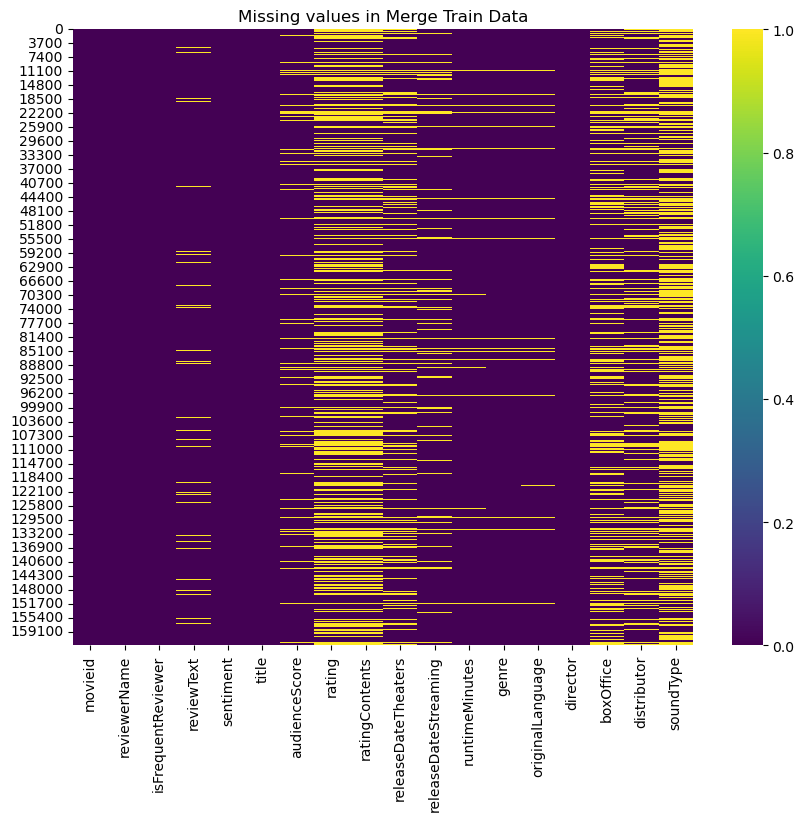

In [22]:
#By using Heatmap from seaborn Library we have vivualize null values from Merge Train DataSet
plt.figure(figsize=(10, 8))
sns.heatmap(merg_trained_data11.isna(), cmap='viridis')
plt.title('Missing values in Merge Train Data')
plt.show()

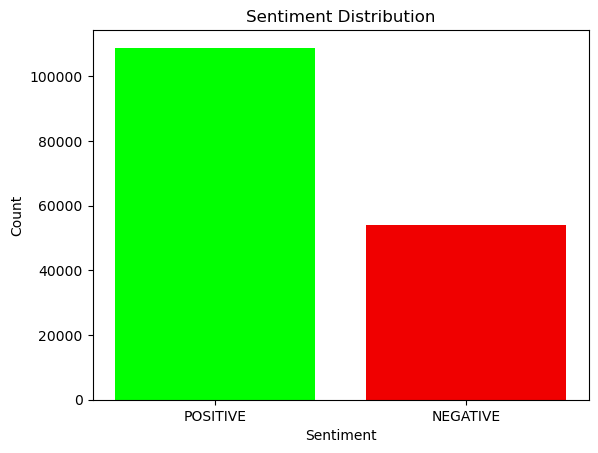

In [23]:
#By using barplot we have plotted Sentiment Distribution of sentiment Column of merge tarined DataSet
#Do value_counts on merg_trained_data11 sentiment column to get count of positive,negative in it
pos_neg_count = merg_trained_data11['sentiment'].value_counts()
colors11 = ['#00FF00','#F00000'] #Green red shades
plt.bar(pos_neg_count.index, pos_neg_count.values,color=colors11) #.index retrives Index of pos_neg Counts,.values provides corresponding counts
# Set labels and title for the plot
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

This Above Plot Indicates data is Imbalanced So it might be case it can Give biased predictions for Negative Label So tried out with Hyperparameter Tunning and SMOTE to reduce Imbalance

/tmp/ipykernel_32/3396952193.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merg_trained_data11.corr(),annot=True)


<Axes: >

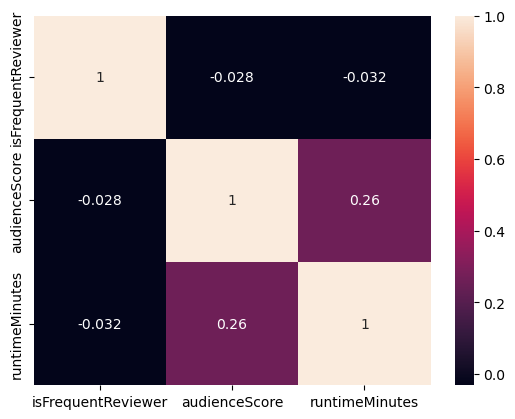

In [24]:
#To get to know how Numerical Columns are well releated Heatmap is used to get Correlation among various Columns of Merge Train Dataset
sns.heatmap(merg_trained_data11.corr(),annot=True)

In [25]:
#From the Above Heatmap We can Conclude that only runtimeMinutes and audienceScore are having Some Correaltion other all columns are 0 correalted with each other
#From this correlation chart we can Conclude that FrequentReviewer Column and audiencescore/runtimeMinutes are Weakly Correlated or Uncorreated 
#2nd Thing to Conclude audienceScore and runtimeMinutes are Weakly Correalted i.e on Avg Bases auidence Score Increases as runtimeMinutes increases

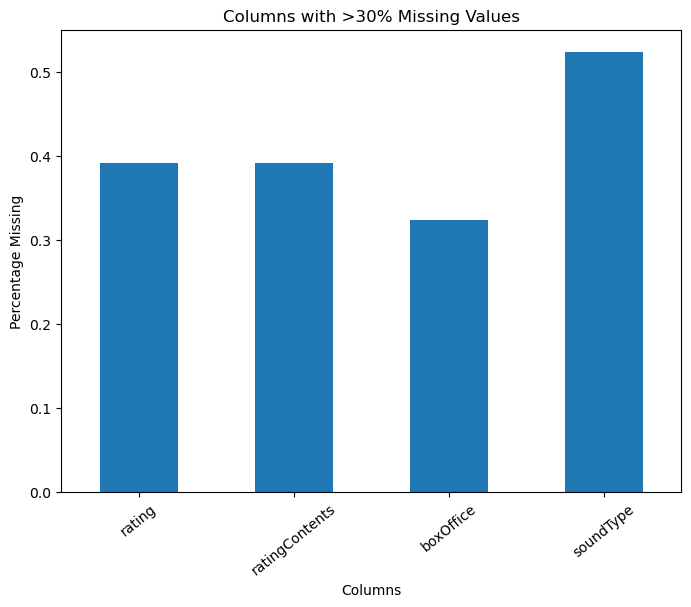

In [26]:
#Above block is used to get names of Columns which are having more than 30 percent Null Values

# Calculate the fraction of missing values in each column
missing_fraction = merg_trained_data11.isna().sum() / len(merg_trained_data11)

# Filter columns with missing values exceeding 30%
columns_with_missing_Values  = missing_fraction[missing_fraction > 0.3]

# Plot the percentage of missing values in each column
plt.figure(figsize=(8, 6))
columns_with_missing_Values.plot(kind='bar')
plt.title('Columns with >30% Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=39)
plt.show()

In [27]:
#Above Columns are Having Higher Null Values So it is Need to Either Impute Them Properly or exculded for training models 

In [28]:
#This boxOffice_conversion function is used to preprocess boxOffice Column which are having Symbols like "$"/'M'/'K' which are replaced using this function
def boxOffice_conversion(x):
    if isinstance(x,str):
        x= x.replace('$','').replace('M','')
        if 'K' in x:
            x = x.replace('K', '')
            return float(x) * 0.001
        else:
            return float(x)
    elif isinstance(x,(int,float)):
        return float(x)
    else:
        return None
    

In [29]:
# Function is used to clean the text using translation and Remove unused symbols
t = str.maketrans('', '', '[],!.?\'"_')
def ratingContents(a):
    if isinstance(a, str):  # Check if the value is a string
        ratingContents = a.translate(t)
        return ratingContents
    else:
        return ''  # Return an empty string for non-string values


In [30]:
#Function soundType is used to preprocess soundType column of Merge Data
def soundType(q):
    if isinstance(q,str):
         return ' '.join(q.replace(',', ' ').split())
    else:
         return q

In [31]:
#Function movieid is used to preprocess movieid column of Merge Data
def movieid(q):
    return ' '.join(q.replace('_', ' ').split())


In [32]:
#Function boxOffice_conversion is Applied to boxOffice column of merge data
merg_trained_data11['boxOffice'] = merg_trained_data11['boxOffice'].apply(boxOffice_conversion)

In [33]:
#Function ratingContents is Applied to ratingContents Column of merge data
merg_trained_data11['ratingContents'] = merg_trained_data11['ratingContents'].apply(ratingContents)

In [34]:
#Function movieid is Applied to movieid Column of merge data
merg_trained_data11['movieid'] = merg_trained_data11['movieid'].apply(movieid)

In [35]:
#Function soundType is Applied to soundType Column of merge data
merg_trained_data11['soundType'] = merg_trained_data11['soundType'].apply(soundType)

In [36]:
#It is used to get names of Columns in merge data
merg_trained_data11.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [37]:
# It is used to preprocess genre Column of merge data by replacing unnecessary characters 
merg_trained_data11['genre'] = merg_trained_data11['genre'].str.replace('&',' ')

In [38]:
#Selecting the columns which are Required for training model from merge data
train_select_columns11 = merg_trained_data11[["reviewText", "audienceScore", "runtimeMinutes","boxOffice","genre","originalLanguage",'distributor',"director","rating","ratingContents","movieid","reviewerName","isFrequentReviewer","title",'soundType',"sentiment"]]

In [39]:
# Sentiment Column is Dropped from X_sel and that Label is provided to y
X_sel = train_select_columns11.iloc[:,:-1]
y= train_select_columns11.iloc[:,-1]

In [40]:
# Splitted Data For Evaluating models 
X_train_com22,X_test_com22,y_train_com22,y_test_com22 = train_test_split(X_sel,y,test_size=0.2,random_state=42)

<Axes: >

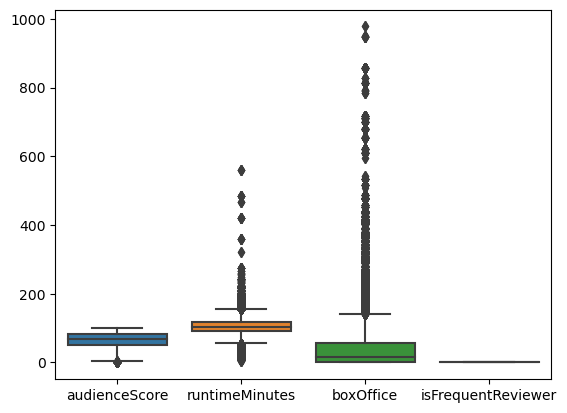

In [57]:
#from seaborn library .boxplot() method is used for drawing boxplot of Numerical columns in train selected dataframe
sns.boxplot(X_train_com22)

In [42]:
#It is used to Calculate Skewness of boxOffice column of train selected dataframe
X_train_com22['boxOffice'].skew()

3.8276676547500648

As boxOffice Column of Train Dataset is Positively Skewed with skewness of 3.82.This indicates that the data distribution has a long tail on the right side, with some larger values that contribute to the skewness.If I impute it with mean it will not be considered as better Option because as boxOffice also contains Outliers so Outliers or larger values on the right side of the distribution can significantly influence the mean, pulling it towards the longer tail.So median Can be considered to impute it is a more robust measure of central tendency that is less influenced by outliers, which could provide a more accurate representation of the typical runtime 

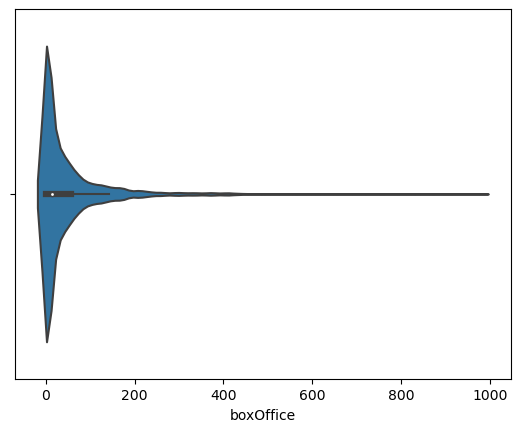

In [63]:
#Violinplot of boxOffice Column of Train Dataset is Drawn to Indicate Distribution
sns.violinplot(data=X_train_com22, x='boxOffice')
plt.show()

In [43]:
#It is used to Calculate Skewness of audienceScore column of train selected dataframe
X_train_com22['audienceScore'].skew()

-0.522208591933888

As AudianceScore is Slightly Negative Skewed(0 to -1) As well as it don't have Outlier So As it is Slightly Skewed So it is having majority of its Values at Higher end Doesn't has much effect of Outlier So strategy to impute it by mean can be considered as a good option for Accurate Result

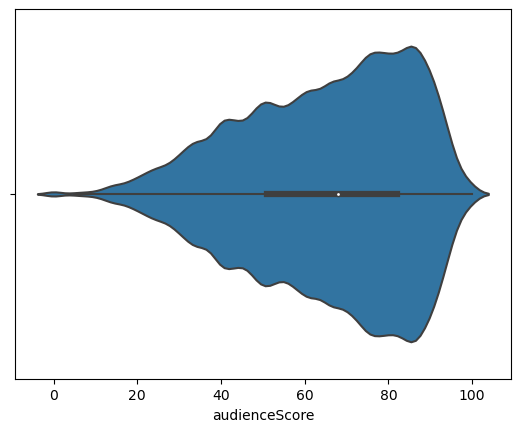

In [62]:
#Violinplot of audienceScore Column of Train Dataset is Drawn to Indicate Distribution
sns.violinplot(data=X_train_com22, x='audienceScore')
plt.show()

In [44]:
#It is used to Calculate Skewness of audienceScore column of train_selected dataframe
X_train_com22['runtimeMinutes'].skew()

1.8701846197915315

As RuntimeMinutes Column of Train Dataset is Positively Skewed with skewness of 1.87.This indicates that the data distribution has a long tail on the right side, with some larger values that contribute to the skewness.If I impute it with mean it will not be considered as better Option because as runtimeminutes also contains Outliers so Outliers or larger values on the right side of the distribution can significantly influence the mean, pulling it towards the longer tail.So median Can be considered to impute it by median is a more robust measure of central tendency that is less influenced by outliers, which could provide a more accurate representation of the typical runtime 

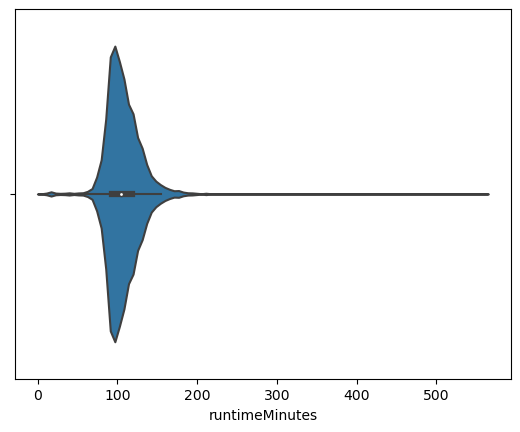

In [64]:
#Violinplot of runtimeMinutes Column of Train Dataset is Drawn to Indicate Distribution
sns.violinplot(data=X_train_com22, x='runtimeMinutes')
plt.show()

<Axes: xlabel='boxOffice', ylabel='Count'>

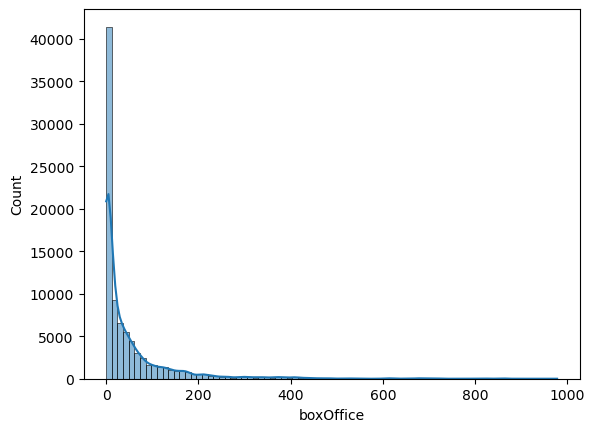

In [56]:
#sns.histplot() is used to draw histogram of boxOffice Coloumn of train selected DataFrame through this also we can conclude skewness
sns.histplot(data=X_train_com22, x='boxOffice', kde=True, bins=80)

<Axes: xlabel='runtimeMinutes', ylabel='Count'>

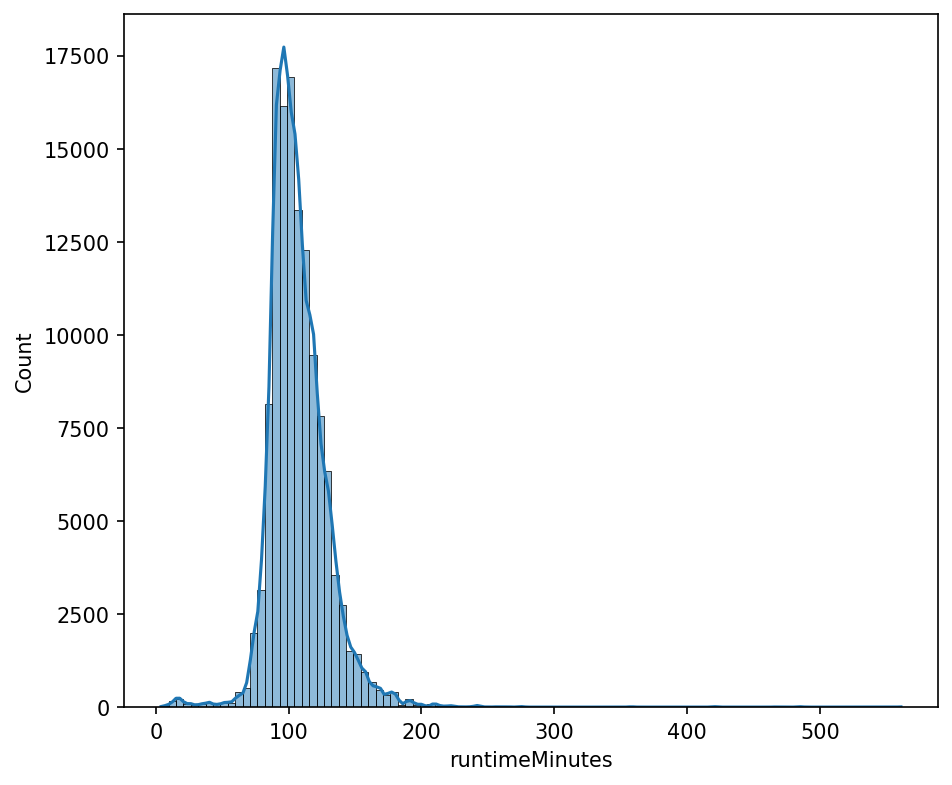

In [54]:
#sns.histplot() is used to draw histogram of runtimeMinutes Coloumn of train selected DataFrame through this also we can conclude skewness
plt.figure(figsize=(7, 6), dpi=150)
sns.histplot(data=X_train_com22, x='runtimeMinutes', kde=True, bins=100)

<Axes: xlabel='audienceScore', ylabel='Count'>

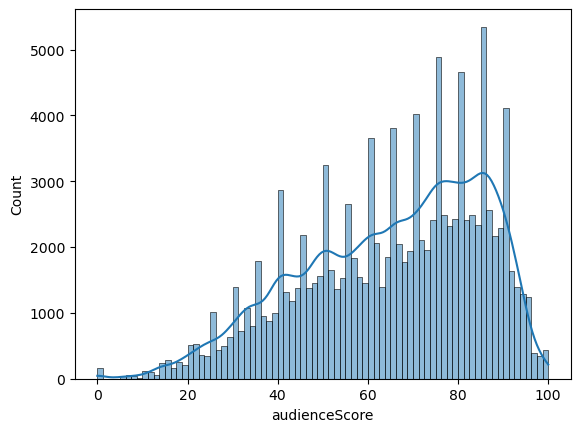

In [52]:
#.histplot() is used to draw histogram of audienceScore Coloumn of train_selected DataFrame through this also we can conclude skewness
sns.histplot(data=X_train_com22, x='audienceScore', kde=True)

In [58]:
#This .columns is used to get names of Column in merge_data_test dataFrame
merg_test_data11.columns

Index(['movieid', 'reviewerName', 'isTopCritic', 'reviewText', 'title',
       'audienceScore', 'rating', 'ratingContents', 'releaseDateTheaters',
       'releaseDateStreaming', 'runtimeMinutes', 'genre', 'originalLanguage',
       'director', 'boxOffice', 'distributor', 'soundType'],
      dtype='object')

In [59]:
#All Functions are applied to Respective Columns of merge test data in order to preprocess same like merge train Data
merg_test_data11['boxOffice'] = merg_test_data11['boxOffice'].apply(boxOffice_conversion)
merg_test_data11['ratingContents'] = merg_test_data11['ratingContents'].apply(ratingContents)
merg_test_data11['movieid'] = merg_test_data11['movieid'].apply(movieid)
merg_test_data11['soundType'] = merg_test_data11['soundType'].apply(soundType)
merg_test_data11['genre'] = merg_test_data11['genre'].apply(soundType)
merg_test_data11['genre'] = merg_test_data11['genre'].str.replace('&',' ')

In [60]:
#Selecting the columns which are Required for test model from merge_data_test same as merge train data
test_select_columns11 =merg_test_data11[["reviewText", "audienceScore","boxOffice", "runtimeMinutes","genre","originalLanguage",'distributor',"director","rating","ratingContents","movieid","reviewerName",'isTopCritic','title',"soundType"]]

In [61]:
#Through this we can see top 5 and bottom 5 headers of dataframe
test_select_columns11

,reviewText,audienceScore,boxOffice,runtimeMinutes,genre,originalLanguage,distributor,director,rating,ratingContents,movieid,reviewerName,isTopCritic,title,soundType
0,Green slowly cranks up the dread with style an...,57.0,64.0000,111.0,Holiday Horror Mystery thriller,English,Universal Pictures,Sara Barnett,R,Gore Bloody Horror Violence Language Throughou...,legend marty mcfly oracle,John Kim,False,Legend Marty McFly Oracle,Dolby Atmos
1,Philip Noyce's direction is elegant and unforc...,86.0,6.2000,94.0,Drama Adventure,English,Miramax Films,Cindy Flander,PG,Emotional Thematic Material,terminator katniss everdeen glimmer,Brian Chaney,False,Terminator Katniss Everdeen Glimmer,Dolby SR DTS Dolby Stereo Surround SDDS Dolby ...
2,It wouldn't do to say what path Maria ultimate...,62.0,NaN,NaN,Drama,French,NaN,Charlotte Bramble,NaN,,james bond labyrinth gollum,Danielle Parker,False,James Bond Labyrinth Gollum,NaN
3,Pig is not exactly the arthouse John Wick that...,84.0,3.1000,92.0,Drama Mystery thriller,English,Neon,Jean Gainer,NaN,,v quest han solo wondrous,Brittany Lane,False,V Quest Han Solo Wondrous,NaN
4,An imaginative no-budget musical of sorts abou...,NaN,NaN,66.0,Drama Musical,Arabic,NaN,Marvin Short,NaN,,enigma hulk surreal starlight,Justin Willis,False,Enigma Hulk Surreal Starlight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55310,Ron Howard delivers an unconventional romantic...,29.0,48.4000,111.0,Comedy,English,Universal Pictures,Jill Fraser,PG-13,Sexual Content Mature Thematic Elements,celestial radiant,Jose Mccormick,False,Celestial Radiant,SDDS Dolby SRD DTS
55311,As an oddball art film that openly invites you...,71.0,0.6411,116.0,Comedy Drama Fantasy,English,Indomina,Daryl Wilson,NaN,,vivid james t. kirk,Thomas Osborne,False,Vivid James T. Kirk,Dolby
55312,Nicholson wears his devilish grin from his fir...,60.0,133.8000,106.0,Comedy,English,Columbia Pictures,Maria Tejada,PG-13,Language Crude Sexual Content,scarlett o'hara neo scarlett o'hara infinite,Julie Kirby,False,Scarlett O'Hara Neo Scarlett O'Hara Infinite,Dolby SR DTS Dolby Stereo Surround SDDS Dolby ...
55313,It's hard not be entertained by two dozen of C...,65.0,13.3000,125.0,Musical Biography Drama Lgbtq+,English,Metro-Goldwyn-Mayer,Jermaine Fantasia,PG-13,Sexual Content,terminator epic rocky balboa mystic,Tina Sutton,True,Terminator Epic Rocky Balboa Mystic,SDDS Dolby Digital DTS Surround


# Detecting Null/missing values in data and imputating Using SimpleImputer

In [41]:
#It is used to compute sum of Missing values of X_train_com22 dataframe
X_train_com22.isna().sum()

reviewText             5228
audienceScore         10617
runtimeMinutes         2695
boxOffice             42186
genre                  1964
originalLanguage       2648
distributor           32570
director                  0
rating                51013
ratingContents            0
movieid                   0
reviewerName              0
isFrequentReviewer        0
title                     0
soundType             68262
dtype: int64

In [65]:
#Simple Imputer is used to impute null values in X_train_com2 and Transform same in X_test_com22

#In si1 imputer strategy to impute null values is selected as median as "boxOffice","runtimeMinutes" column of X_train_com22 having Positive Skewness with Outliers
si1 = SimpleImputer(missing_values=np.nan,strategy='median')
X_train_com22['boxOffice'] = si1.fit_transform(X_train_com22[['boxOffice']])
X_test_com22['boxOffice'] = si1.transform(X_test_com22[['boxOffice']])
test_select_columns11['boxOffice'] = si1.transform(test_select_columns11[['boxOffice']])
X_train_com22['runtimeMinutes'] = si1.fit_transform(X_train_com22[['runtimeMinutes']])
X_test_com22['runtimeMinutes'] = si1.transform(X_test_com22[['runtimeMinutes']])
test_select_columns11['runtimeMinutes'] = si1.transform(test_select_columns11[['runtimeMinutes']])

#In si2 imputer strategy to impute null values is selected as mean as "audienceScore" column of X_train_com22 having Slightly Negative Skewness(0 to -1)
si2 = SimpleImputer(missing_values=np.nan,strategy='mean')
X_train_com22['audienceScore'] = si2.fit_transform(X_train_com22[['audienceScore']])
X_test_com22['audienceScore'] = si2.transform(X_test_com22[['audienceScore']])
test_select_columns11['audienceScore'] = si2.transform(test_select_columns11[['audienceScore']])


#In si3 imputer strategy to impute null values is selected as contant as "reviewText","genre","distributor","originalLanguage" columns 
#of X_train_com22 having text data so it would be better to fill it with space
si3 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='')
X_train_com22['reviewText'] = si3.fit_transform(X_train_com22[['reviewText']])
X_test_com22['reviewText'] = si3.transform(X_test_com22[['reviewText']])
test_select_columns11['reviewText'] = si3.transform(test_select_columns11[['reviewText']])
X_train_com22['genre'] = si3.fit_transform(X_train_com22[['genre']])
X_test_com22['genre'] = si3.transform(X_test_com22[['genre']])
test_select_columns11['genre'] = si3.transform(test_select_columns11[['genre']])
X_train_com22['distributor'] = si3.fit_transform(X_train_com22[['distributor']])
X_test_com22['distributor'] = si3.transform(X_test_com22[['distributor']])
test_select_columns11['distributor'] = si3.transform(test_select_columns11[['distributor']])
X_train_com22['originalLanguage'] = si3.fit_transform(X_train_com22[['originalLanguage']])
X_test_com22['originalLanguage'] = si3.transform(X_test_com22[['originalLanguage']])
test_select_columns11['originalLanguage'] = si3.transform(test_select_columns11[['originalLanguage']])
X_train_com22['rating'] = si3.fit_transform(X_train_com22[['rating']])
X_test_com22['rating'] = si3.transform(X_test_com22[['rating']])
test_select_columns11['rating'] = si3.transform(test_select_columns11[['rating']])
X_train_com22['soundType'] = si3.fit_transform(X_train_com22[['soundType']])
X_test_com22['soundType'] = si3.transform(X_test_com22[['soundType']])
test_select_columns11['soundType'] = si3.transform(test_select_columns11[['soundType']])

/tmp/ipykernel_32/142683710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_select_columns11['boxOffice'] = si1.transform(test_select_columns11[['boxOffice']])
/tmp/ipykernel_32/142683710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_select_columns11['runtimeMinutes'] = si1.transform(test_select_columns11[['runtimeMinutes']])
/tmp/ipykernel_32/142683710.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

# Scaling numerical features Using Standard Scaler and Robust Scaler 

In [66]:
#Standard scaler is used to Scale Numerical Features through which it is Ensured that they are Compatible Scale
scaler = StandardScaler()

#Here I fit transformed audienceScore Column of X_train_com22 by using Standard Scaler and transfomed test data Accordingly
X_train_com22['audienceScore'] = scaler.fit_transform(X_train_com22[['audienceScore']])
X_test_com22['audienceScore'] = scaler.transform(X_test_com22[['audienceScore']])
test_select_columns11['audienceScore'] = scaler.transform(test_select_columns11[['audienceScore']])

# The RobustScaler method scales features using statistics that are robust to the presence of outliers. 
# Instead of using the mean and standard deviation like in Standard Scaler,
# it uses the median and the interquartile range (IQR) to scale the data. 
robust = RobustScaler()

#Here I fit transformed boxOffice Column of X_train_com22 by using Robust Scaler as it contains Outlier and transfomed test data Accordingly 
X_train_com22['boxOffice'] = robust.fit_transform(X_train_com22[['boxOffice']])
X_test_com22['boxOffice'] = robust.transform(X_test_com22[['boxOffice']])
test_select_columns11['boxOffice'] = robust.transform(test_select_columns11[['boxOffice']])



#Here I fit transformed runtimeMinutes Column of train selected by using Robust Scaler as it contains Outliers and transfomed test data Accordingly
X_train_com22['runtimeMinutes'] = robust.fit_transform(X_train_com22[['runtimeMinutes']])
X_test_com22['runtimeMinutes'] = robust.transform(X_test_com22[['runtimeMinutes']])
test_select_columns11['runtimeMinutes'] = robust.transform(test_select_columns11[['runtimeMinutes']])

/tmp/ipykernel_32/3907004097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_select_columns11['audienceScore'] = scaler.transform(test_select_columns11[['audienceScore']])
/tmp/ipykernel_32/3907004097.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_select_columns11['boxOffice'] = robust.transform(test_select_columns11[['boxOffice']])
/tmp/ipykernel_32/3907004097.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

# Label Encoder for Encoding Categorical Features

In [67]:
#Here Label Encoder is Used for replacing Positive,Negative values in sentiment Column of train_selected by 1,0 respectively
y_train_com22 = y_train_com22.replace(['POSITIVE','NEGATIVE'],[1,0])


In [68]:
#Here Label Encoder is Used for replacing Positive,Negative values in sentiment Column of test by 1,0 respectively
y_test_com22 = y_test_com22.replace(['POSITIVE','NEGATIVE'],[1,0])

# Text Combining and Vectorizing

In [69]:
#Concating text Columns 
train_com_train =pd.concat([X_train_com22['reviewText'],X_train_com22['genre'],X_train_com22['originalLanguage'],X_train_com22['distributor'],X_train_com22['director'],X_train_com22['rating'],X_train_com22['ratingContents'],X_train_com22['movieid'],X_train_com22['reviewerName'],X_train_com22['isFrequentReviewer'],X_train_com22['title'],X_train_com22['soundType']],axis=1)
#New Column is added namely Combined text which Containes Cobmination all Columns Combined
train_com_train['combined_text'] = train_com_train['reviewText'] + ' ' + train_com_train['genre']+ ' '+train_com_train['originalLanguage']+ ' ' +train_com_train['distributor']+' '+train_com_train['director']+ ' '+train_com_train['rating']+' '+train_com_train['ratingContents']+' '+train_com_train['movieid']+' '+train_com_train['reviewerName']+' '+train_com_train['isFrequentReviewer'].astype(str)+' '+train_com_train['title']+' '+train_com_train['soundType']

In [70]:
#Concating text Columns 
test_com_test =pd.concat([X_test_com22['reviewText'],X_test_com22['genre'],X_test_com22['originalLanguage'],X_test_com22['distributor'],X_test_com22['director'],X_test_com22['rating'],X_test_com22['ratingContents'],X_test_com22['movieid'],X_test_com22['reviewerName'],X_test_com22['isFrequentReviewer'],X_test_com22['title'],X_test_com22['soundType']],axis=1)
#New Column is added namely Combined text which Containes Cobmination all Columns Combined
test_com_test['combined_text'] = test_com_test['reviewText'] + ' ' + test_com_test['genre']+ ' '+test_com_test['originalLanguage']+ ' ' +test_com_test['distributor']+' '+test_com_test['director']+ ' '+test_com_test['rating']+' '+test_com_test['ratingContents']+' '+test_com_test['movieid']+' '+test_com_test['reviewerName']+' '+test_com_test['isFrequentReviewer'].astype(str)+' '+test_com_test['title']+' '+test_com_test['soundType']

In [71]:
#Concating text Columns
test_com =pd.concat([test_select_columns11['reviewText'],test_select_columns11['genre'],test_select_columns11['originalLanguage'],test_select_columns11['distributor'],test_select_columns11['director'],test_select_columns11['rating'],test_select_columns11['ratingContents'],test_select_columns11['movieid'],test_select_columns11['reviewerName'],test_select_columns11['isTopCritic'],test_select_columns11['title'],test_select_columns11['soundType']],axis=1)
#New Column is added namely Combined text which Containes Cobmination all Columns Combined
test_com['combined_text'] = test_com['reviewText'] + ' ' + test_com['genre']+ ' '+test_com['originalLanguage']+ ' ' +test_com['distributor']+' '+test_com['director']+' '+test_com['rating']+' '+test_com['ratingContents']+' '+test_com['movieid']+' '+test_com['reviewerName']+' '+test_com['isTopCritic'].astype(str)+' '+test_com['title']+' '+test_com['soundType']

* **TFIDF Vectorizer** -
  Term Frequency-Inverse Document Frequency(TFIDF) is used to get importance of word in particular document by knowing its Term frequency value in Large Corpus of Words,Term Frequency is Count of word in Document divided total number of words in Document ,IDF means Uniquness of particular words in Document and there are various parameter of TFidf Vectorizer like Stop words (i.e Words like and,a,an which doesn't carries significant value for classification problems they are removed through it,n_gram parameter is used to set how much minimum and maximum size of particular token is to be considered)

In [72]:
#Tfidf Vectorizer is used to tokenize Combined Text from train and Test combined data
vect = TfidfVectorizer(stop_words='english',ngram_range=(1,2))

# Fit the vectorizer on the training data and transform both training and test data
X_train_com22_vect = vect.fit_transform(train_com_train['combined_text'])
X_test_com22_vect = vect.transform(test_com_test['combined_text'])
test_vect_com11 = vect.transform(test_com['combined_text'])

In [73]:
#Text columns are removed from train dataframe before passing it to hstack 
X_train_com22 = X_train_com22.drop(columns=['reviewText','genre','originalLanguage','distributor','director','rating','ratingContents',"movieid","reviewerName","isFrequentReviewer","title",'soundType'])

In [74]:
#Text columns are removed from test dataframe before passing it to hstack 
X_test_com22 = X_test_com22.drop(columns=['reviewText','genre','originalLanguage','distributor','director','rating','ratingContents',"movieid","reviewerName",'isFrequentReviewer',"title",'soundType'])

In [75]:
#Text columns are removed from test dataframe before passing it to hstack
test_select_columns11 = test_select_columns11.drop(columns=['reviewText','genre','originalLanguage','distributor','director','rating','ratingContents',"movieid","reviewerName",'isTopCritic',"title",'soundType'])

In [76]:
#Hstack is used to stack train feature matrix to create Combined Feature Matrix
# The function is used for creating larger arrays by combining smaller arrays in a horizontal manner
#It is used to process data further for Feature Engineering / Feature Extraction
#By using csr_matrix, it is ensured that the data types are consistent and compatible for the horizontal stacking
trained_X_com22 = hstack([X_train_com22_vect,csr_matrix(X_train_com22)])
test_X_com22 = hstack([X_test_com22_vect,csr_matrix(X_test_com22)])
test_submit = hstack([test_vect_com11,csr_matrix(test_select_columns11)])

In [78]:
#Shape of Training Data 
trained_X_com22.shape

(130206, 1164285)

In [79]:
#Shape of Test Data 
test_X_com22.shape

(32552, 1164285)

#  Feature Extraction-


In [ ]:
#Features Selection using SelectPercentile

# Define a pipeline with feature selection and a logistic regression classifier
# The feature selection method is SelectPercentile with a scoring function f_classif
# The classifier is LogisticRegression
pipe = Pipeline([
    ('feature_selection', SelectPercentile(score_func=f_classif)),
    ('classifier', LogisticRegression())
])


# Define the parameter grid for hyperparameter tuning
parameter_s = {
    'feature_selection__percentile': [0.5,1,5,10, 25, 50],
    'feature_selection__score_func': [f_classif, chi2],
    'classifier__C': [0.1, 1.0, 10.0]
}

# Define custom scoring metrics: F1 score and ROC AUC
scoring_metrics = {
    'F1': make_scorer(f1_score),
    'ROC_AUC': make_scorer(roc_auc_score)
}

# Create a GridSearchCV object for hyperparameter tuning
grid_ = GridSearchCV(pipe, param_grid=parameter_s, cv=5, scoring=scoring_metrics, refit='ROC_AUC', n_jobs=-1)

# Fit the GridSearchCV object to the data
# This line executes the hyperparameter search
grid_.fit(trained_X_com22, y_train_com22)


# Print the best estimator found by GridSearchCV
print(grid_.best_estimator_)
# Print the best hyperparameters found by GridSearchCV
print(grid_.best_params_)
# Print the best score (ROC AUC) achieved by the best estimator
print(grid_.best_score_)

In [ ]:
# best parameters for SelectPercentile for this data
print(grid_.best_params_)

In [80]:
# Create a SelectPercentile feature selector with a percentile value of 50
#feat = SelectPercentile(score_func= f_classif, percentile=50.0)
feat = SelectPercentile(percentile=50,score_func= f_classif)

# Fit the feature selector to the training data  and target labels 
train_percentile_feature_matrix = feat.fit_transform(trained_X_com22, y_train_com22)

In [81]:
#Transform the feature selector to the test data (test_X_com22) 
test_percentile_feature_matrix = feat.transform(test_X_com22)

In [82]:
# Shape of train Feature matrix
train_percentile_feature_matrix.shape

(130206, 582142)

In [83]:
# Shape of test Feature matrix
test_percentile_feature_matrix.shape

(32552, 582142)

In [ ]:
# SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# I had executed Smote to handle imbalancing in train_data sentiment Column as there was minority class as negative value,
# I Assumed that it was not giving good Prediction for negative sentiment.So,tried it out using smote but instead it reduced accuracy and F1 score

# Classification Baseline Model

# DummyClassifier-
 Dummy Classifier is baseline model it doesn't Gives Actual Prediction for problem but it can provide baseline model which can be used for evaluating performance of other models in effective way by Considering some baseline

In [84]:
#Implementation of DummyClassifier Using most_frequent as Strategy

dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the Dummy model to the training data and target labels 
dummy_clf.fit(train_percentile_feature_matrix, y_train_com22)

# Predict the labels for the test data
predictions = dummy_clf.predict(test_percentile_feature_matrix)

print(accuracy_score(y_test_com22,predictions))

0.6714180388301794


# Classification Models 

# Linear_SVC Model - 
Linear SVC stands for Support Vector Classifier which aims to find best Hyperplane that seperates 2 classes in Feature Space .That Hyperplane can be a Straight Line as well which can be used to Seperate Positive and Negative Classes in This Classification problem.This hyperplane can be a straight line in two-dimensional space, a plane in three-dimensional space, and a higher-dimensional linear subspace in higher dimensions.This Linear SVC Model can be tunned with Perfect parameters in Order to it can Classify Positive and Negative Labels Correctly

In [85]:
#Set Object for LinearSVC model
svc = LinearSVC(random_state=42)

In [ ]:
#Hyperparameters for Linear_SVC Model
param_Linear_svc = {
    'C': [0.01, 0.1, 1.0, 10.0,20.0],  # Regularization parameter
    'loss': ['hinge', 'squared_hinge'],  # Loss function
    'max_iter':[100,200,500], #maximum Iteration for Problem to get Converge
    'class_weight': [None, 'balanced'], #it tells wheather data balancing is req or not
}

In [ ]:
# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid=param_Linear_svc, cv=5, n_jobs=-1,scoring='f1')

# Fit the GridSearchCV object to the data
# This line executes the hyperparameter search
grid_search.fit(trained_X_com11, y_train)

In [ ]:
#Best Parameters obtained from LinearSVC grid search
grid_search.best_params_

Best Parameters Obtained From GridSearchCV C= 1.0,loss='squared_hinge', max_iter= 100,class_weight=None

In [86]:
# Linear SVC model is Tunned with best parameter obtained from Gridsearch CV
svc2 = LinearSVC(C= 1.0,loss='squared_hinge', max_iter= 100,class_weight=None)

# Fit the Linear SVC model to the training data and target labels 
svc2.fit(train_percentile_feature_matrix, y_train_com22)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100, random_state=32)

In [87]:
# Predict the labels for the test data using the trained Support Vector Classifier (svc2) and Store Result in y_pred_svc2
y_pred_svc2= svc2.predict(test_percentile_feature_matrix)

In [88]:
# Print a classification report to evaluate the performance of a Linear SVC classifier
# The classification report will provide various metrics such as precision, recall, F1-score
# It compares the predicted labels (y_pred_svc2) to the true labels (y_test_new11) for the test data
# This report is helpful for understanding the model's performance on different classes
print(classification_report(y_test_com22,y_pred_svc2))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70     10696
           1       0.84      0.91      0.87     21856

    accuracy                           0.82     32552
   macro avg       0.81      0.78      0.79     32552
weighted avg       0.82      0.82      0.82     32552



In [89]:
#print Confusion matrix
print(confusion_matrix(y_test_com22,y_pred_svc2))

[[ 6884  3812]
 [ 1988 19868]]


# Logistic Regression-
Logistic Regression is based on Logistic Function called as Sigmoid function which mapps input between 0 to 1 and Output is probability of Input Belonging to one of 2 classes.logistic function allows smooth transition between 2 classes . It's well-suited when the target variable (the one we're trying to predict) is categorical and has two classes, such as "Positive/Negative" ,"spam/not spam", "fraudulent/legitimate".

In [111]:
#Create the Object for LogisticRegression Model
logistic = LogisticRegression(random_state = 42)

In [ ]:
#Hyperparameters for Logistic
Logistic_parameters = {
    'C': np.logspace(-4,4,10),              # Regularization parameter
    'solver': ['liblinear', 'lbfgs','saga'],# solvers during the cross-validation process try to find best solvers 
    'max_iter':[200,500,1000,2000],         # maximum Iteration for Problem to get Converge
    'class_weight':[None,'balanced']        #it tells wheather data balancing is required or not
}

In [ ]:
# Create a Logistic Regression model with a maximum of 1000 iterations
model_logistic = LogisticRegression(max_iter=1000,random_state=42)

# Set up a GridSearchCV to search for the best hyperparameters for the Logistic Regression model
# Logistic_parameters is a predefined dictionary containing hyperparameter values to search over
# n_jobs=-1 indicates that the search will use all available CPU cores for parallelization
# cv=5 specifies a 5-fold cross-validation for evaluating different hyperparameters
# scoring='f1' indicates that the F1-score will be used as the scoring metric for model selection

logis = GridSearchCV(model_logistic,param_grid=Logistic_parameters,n_jobs=-1,cv=5,scoring='f1')

In [ ]:
# Fit the GridSearchCV object to the data
# This line executes the hyperparameter search
logis.fit(X_train_new11,y_train_new11)

In [ ]:
#Best Parameters Obtained from GridSearchCV HyperParameter tunning
logis.best_params_

 Best Parameters obtained from GridSearchCV C=21.54434690031882 ,max_iter= 1000,solver= 'lbfgs'

In [92]:
# LogisticRegression model is tunned with best parameters which are Obtained from GridSearchCV
logis11=LogisticRegression(C=21.54434690031882 ,max_iter= 1000,solver= 'lbfgs')

In [102]:
# Fit the LogisticRegression model to the training data (X) and target labels (y_train)
logis11.fit(train_percentile_feature_matrix, y_train_com22)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=21.54434690031882, max_iter=1000)

In [103]:
# Predict the labels for the test data using the trained LogisticRegression model and Store Result in y_pred_svc2
y_pred_logis = logis11.predict(test_percentile_feature_matrix)

In [104]:
# Print a classification report to evaluate the performance of a LogisticRegression Model
# The classification report will provide various metrics such as precision, recall, F1-score
# It compares the predicted labels (y_pred_logis) to the true labels (y_test_new11) for the test data
# This report is helpful for understanding the model's performance on different classes

print(classification_report(y_test_com22,y_pred_logis))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70     10696
           1       0.84      0.91      0.87     21856

    accuracy                           0.82     32552
   macro avg       0.81      0.77      0.79     32552
weighted avg       0.82      0.82      0.82     32552



In [105]:
#print Confusion matrix
print(confusion_matrix(y_test_com22,y_pred_logis))

[[ 6825  3871]
 [ 1945 19911]]


# SGD Classifier-
SGD Classifier(Stochastic Gradient Descent) is the classification algorithm in Machine Learning ,Its Effective to Handle Large Datasets when dealing with sparse Data,SGD classifer Supports Various Loss functions Like log_loss,hinge we can set it for Hyperparameter tunning for selecting Best possible Loss Function.It also Supports L1,L2 Regularization In order to Handle Overfitting Problem 


In [ ]:
#Create the Object for SGDClassifier Model
sgd = SGDClassifier(random_state=42)

In [ ]:
#Hyperparameters for SGD Classifer Model
param_sgd = {
    'alpha': [0.001, 0.01, 0.1,1], # Regularization parameter 
    'max_iter': [100, 200, 500,1000],   # Maximum number of iterations
    'penalty': ['l2', 'l1',None],    # Penalty term(L1,L2)
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], # Learning rate update strategy
    'eta0': [0.01, 0.1, 0.5,1.0],    # Initial learning rate 
    'shuffle': [True, False],     # Whether to shuffle the training data
    'loss': ['hinge', 'log_loss', 'modified_huber', 'perceptron'],    # Loss function to use
}

In [ ]:
# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(sgd, param_grid=param_sgd, cv=5, n_jobs=-1,scoring='accuracy')

In [ ]:
# Fit the GridSearchCV object to the data
# This line executes the hyperparameter search
grid_search.fit(trained_X_com11,y_train)

In [ ]:
#best parameters obtained After Hyperparameter Tunning using Grid Search
grid_search.best_params_

Best Parameters Obtained from GridSearchCV alpha = 0.1,eta0=0.5,max_iter = 200,penalty=None,loss='log_loss',learning_rate='adaptive',shuffle=True,random_state=42

In [106]:
# Stochastic Gradient Descent model is tunned with best parameters which are Obtained from GridSearchCV
sgd = SGDClassifier(alpha = 0.1,eta0=0.5,max_iter = 200,penalty=None,loss='log_loss',learning_rate='adaptive',shuffle=True,random_state=42)

In [107]:
# Fit the Stochastic Gradient Descent model to the training data and target labels
sgd.fit(train_percentile_feature_matrix, y_train_com22)

SGDClassifier(alpha=0.1, eta0=0.5, learning_rate='adaptive', loss='log_loss',
              max_iter=200, penalty=None, random_state=42)

In [108]:
# Predict the labels for the test data using the trained SGD model and Store Result in y_pred_sgd
y_pred_sgd = sgd.predict(test_percentile_feature_matrix)

In [109]:
# Print a classification report to evaluate the performance of a LogisticRegression Model
# The classification report will provide various metrics such as precision, recall, F1-score
# It compares the predicted labels (y_pred_sgd) to the true labels (y_test_new11) for the test data
# This report is helpful for understanding the model's performance on different classes

print(classification_report(y_test_com22,y_pred_sgd))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     10696
           1       0.84      0.90      0.87     21856

    accuracy                           0.82     32552
   macro avg       0.80      0.77      0.78     32552
weighted avg       0.81      0.82      0.81     32552



In [110]:
#print Confusion matrix
print(confusion_matrix(y_test_com22,y_pred_sgd))

[[ 6852  3844]
 [ 2096 19760]]


# Combined Ensemble Model-
This Model Combines predictions of Multiple models to make Final Predictions.Models Used for this Combined Ensemble Model are Linear_SVC(with Best parameters),LogisticRegression(with best parameters),SGDClassifier(with best parameters).This Ensemble methods can often lead to improved predictive performance, robustness, and generalization, making them a powerful tool in machine learning.As well as this models Reduces Weakness of Each model and Improves Overall performance for Making Predictions


In [112]:
#List of Machine Learning models is created by passing model names and its hyperparameter tunned best parameters and model
estimators = [('linear_svc',svc2),('Logistic',logis11),("SGD",sgd)]

In [113]:
# This is powerfull ensemble Machine Learning Model which combines multiple Machine Learning models to make more accurate predictions
# By allowing voting on final predictions the voting classifier Leverages Strength of each model and Lead to better improved performance
combined_model = VotingClassifier(estimators)

In [114]:
#This pipeline can be helpful for encapsulating the entire process of the combined ensemble model, 
#making it easy to fit, predict, and evaluate the combined model
pipeline = Pipeline([('combined_model', combined_model)])

In [115]:
# Fit the Combined Model to the training data and target labels
pipeline.fit(train_percentile_feature_matrix, y_train_com22)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('combined_model',
                 VotingClassifier(estimators=[('linear_svc',
                                               LinearSVC(max_iter=100,
                                                         random_state=32)),
                                              ('Logistic',
                                               LogisticRegression(C=21.54434690031882,
                                                                  max_iter=1000)),
                                              ('SGD',
                                               SGDClassifier(alpha=0.1,
                                                             eta0=0.5,
                                                             learning_rate='adaptive',
                                                             loss='log_loss',
                                                             max_iter=200,
                                                             penalty=None,
                                                             random_state=42))]))])

In [116]:
# Predict the labels for the test data using the trained Combined model and Store Result in y_pred_combined
y_pred_combined = pipeline.predict(test_percentile_feature_matrix)

In [117]:
# Classification report to evaluate the performance of a Combined Model
# The classification report will provide various metrics such as precision, recall, F1-score
# It compares the predicted labels (y_pred_combined) to the true labels (y_test_new11) for the test data
# This report is helpful for understanding the model's performance on different classes

print(classification_report(y_test_com22,y_pred_combined))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70     10696
           1       0.84      0.91      0.87     21856

    accuracy                           0.82     32552
   macro avg       0.81      0.78      0.79     32552
weighted avg       0.82      0.82      0.82     32552



In [118]:
#print Confusion matrix
print(confusion_matrix(y_test_com22,y_pred_combined))

[[ 6843  3853]
 [ 1954 19902]]


# Generating Submission File

In [119]:
# Create a list of predicted labels ('POSITIVE' or 'NEGATIVE') based on the binary predictions in y_pred_logis
predicted122 = ['POSITIVE' if label11 == 1 else 'NEGATIVE' for label11 in y_pred_logis]
# Create a DataFrame to store the submission format
sub41 = pd.DataFrame({'sentiment': predicted122})
# Set the index name for the DataFrame
sub41.index.name = 'id'
# Save the DataFrame to a CSV file named 'submission.csv' with Includes Index
sub41.to_csv('submission.csv', index=True, encoding='utf-8')